# Exploring Impacts of Snowpack Depth Changes on the Ski Industry 
 Author: Jeremy Larkin
 
Date: March 30, 2023

Liscense: MIT -- https://opensource.org/licenses/MIT

## Introduction
 A change in snowpack depth over time is important to hydrology because snowpack is a crucial piece in the hydrological cycle. Snowpack provides a store of freshwater that feeds rivers that transports water to the surrounding watersheds. Changes in snowpack volume and melt rate can have drastic effects on the environment and infrastructure. For example, a decrease in snowpack depth can lead to lower flow during melt season and drier streams in the summer, causing water supply issues related to  irrigation and a lack of water for plants and wildlife. On the flip side, an increase in snowpack depth can lead to more flooding impacting infrastructure and putting people at risk. More specifically, changes in snowpack has impacts on the ski industry and the economy of ski towns.

## Research Question 
A changing snowpack has the potential to make big impacts on the ski industry. Of all places to study, Colorado is known for their ski conditions with the Rocky Mountains cutting through the state. A decrease in snowpack depth can lead to shorter ski seasons, reduced snow quality, and fewer visitors travelling to ski resorts. This can have significant economic impacts on the ski industry, including decreased revenue, loss of jobs, and reduced investment in ski resort infrastructure.

On a larger scale, the ski industry contributes to the overall economy of local communities, most directly impacting small businesses and tourism-dependent industries. Therefore, changes in snowpack depth can have growing effects on the local economy, affecting the broader community. Many ski resorts have made investments in snowmaking technology to protect against climate change and changing snowfall conditions.

This experiment is designed to determine if there is a significant decrease in Colorado snowpack over the last couple decades, and what the risks may be for the ski industry. 

## Site Description
The extent of the study site is the Rocky Mounains of Colorado surrounding the SNOTEL gauge on Grizzly Mountain. SNOTEL stands for snow telemetry and it provides data including snow depth, snow water equivalent, temperature and precipitation data at a high elevation location using an automated collection device.

## Data Description
The dataset used in this study is daily snow depth SNOTEL data from the USDA site from site number 505, on Grizzly Peak, CO. This dataset has data for a duration of 22 years beginning in 2001 and continues through March of 2023.  

## Snowpack Data Code

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
import os
os.chdir('C:/Users/jdlar/OneDrive/Documents/Jeremy College/ESCI796/Final Project')

In [2]:
#%% Specify Parameters
subfolder_name= "Grizzly Peak, CO Snowpack"

# Name of site location used for figure titles
fig_title='Grizzly Peak, CO'

# Data file for first full year of soil moisture data
infile_name='505_25_YEAR=2001.csv'

Loading snowpack depth data for the year of 2001 and using a defined function to run the snow depth data from the entire dataset. 

In [3]:
#%% Load snow depth data

# Read first year file and edit data using defined readsnotel function
def readsnotel(filename):
    data=pd.read_csv(filename,header=1,na_values=[-99.9,201],parse_dates=['Date'],index_col='Date')
    data=data.rename(columns={'SNWD.I-1 (in) ':'Snowdepth (in)'})
    data=data[['Snowdepth (in)']]
    data['Snowdepth (cm)']=data['Snowdepth (in)']*2.54  #convert snow depth from in to cm
    return data

filenames=os.listdir(subfolder_name)

if 'data' in globals():
    del data

#Use for loop to run all data 
for filename in filenames:
    data1=readsnotel(subfolder_name+'\\'+filename)
    try:
        data=pd.concat([data,data1])
    except:
        data=data1
    data.sort_index(inplace=True)

Data wrangling including removing outlier data and unreasonable values from the snow depth data.

In [4]:
#%% Data Correction; Removing values with a large differential and filling them with the previous data point

for i in range (5):
    
    data['difference']=data['Snowdepth (cm)'].diff()
    data.loc[data['difference']>50,'Snowdepth (cm)']=np.nan
    data.loc[data['Snowdepth (cm)']<0,'Snowdepth (cm)']=np.nan
    data.fillna(method='ffill',inplace=True)

Plotting snowpack depth in centimeters over the duration of the period of study. 

Text(0.5, 1.0, 'Grizzly Peak, CO')

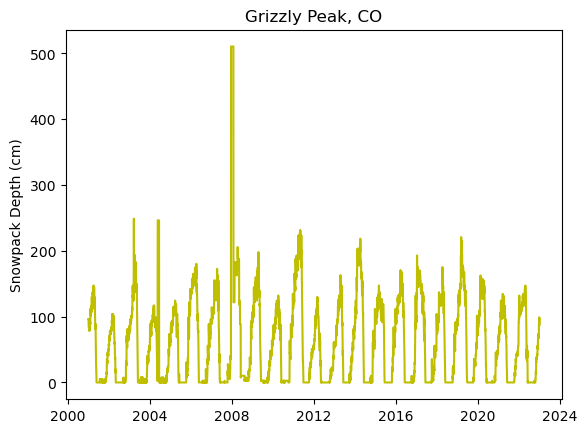

In [5]:
#%% Time series plot

fig, (ax1) =plt.subplots()

ax1.plot(data['Snowdepth (cm)'],'y-')
ax1.set_ylabel('Snowpack Depth (cm)')
ax1.set_title(fig_title)

### Calculations:
Code for statistical analysis (trends, variability, mean etc.)

### Statistical Trends
Code with graphs showing above statistical trends

## Discussion and Conclusion
In this section the dataframes, graphs, and calculations will by analyzed and conclusions regarding if snow depth is changing over time will be made.